<Figure size 1080x1800 with 0 Axes>

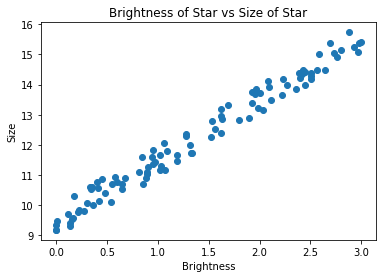

<Figure size 1080x1800 with 0 Axes>

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# Generating Randomized dataset
X = 3*np.random.rand(100,1)
y = 9 + 2*X+np.random.rand(100,1)

# Scatter plot
plt.scatter(X,y)
plt.xlabel('Brightness')
plt.ylabel('Size')
plt.title('Brightness of Star vs Size of Star')
plt.figure(figsize=(15,25))

In [ ]:
# getting the threshold

thresh = np.median(y)
thresh

# now we are concluding that if size of star is bigger than thresh, then it is a BIG star
# otherwise it's a SMALL star

11.913405954674332

In [ ]:
m, n = X.shape
m, n

(100, 1)

In [ ]:
W = np.zeros(n)
b = 0

iterations = 1000
learning_rate = 0.01

In [ ]:
def predict(X, W, b):
    return W*X + b

In [ ]:
def cost_function(X, y, W, b):
    n = len(X)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (W*X[i] + b))**2
    return total_error / n

In [ ]:
def update_weights(X, y, W, b, learning_rate):
    dW = 0
    db = 0
    n = len(X)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        dW += -2*X[i] * (y[i] - (W*X[i] + b))

        # -2(y - (mx + b))
        db += -2*(y[i] - (W*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    W -= (dW / n) * learning_rate
    b -= (db / n) * learning_rate

    return W, b

In [ ]:
def train(X, y, W, b, learning_rate, iterations):
    costs = []

    for i in range(iterations):
        W, b = update_weights(X, y, W, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(X, y, W, b)
        costs.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={}, weight={}, bias={}, cost={}".format(i, W, b, cost))

    return W, b, costs

In [ ]:
costs = np.zeros(iterations)

# Running Gradient Descent
#W, b, costs = gradient_descent(X, y, W, b, learning_rate, iterations)
W, b, costs = train(X, y, W, b, learning_rate, iterations)

iter=0, weight=[0.37205065], bias=[0.24492431], cost=[134.22243698]
iter=10, weight=[2.87497478], bias=[2.01007483], cost=[39.81410901]
iter=20, weight=[4.01070859], bias=[3.00080629], cost=[16.95973397]
iter=30, weight=[4.48823411], bias=[3.61051632], cost=[10.9306398]
iter=40, weight=[4.65051041], bias=[4.02987744], cost=[8.90265844]
iter=50, weight=[4.66336443], bias=[4.35143886], cost=[7.86679172]
iter=60, weight=[4.60690556], bias=[4.62024994], cost=[7.11337774]
iter=70, weight=[4.51976622], bias=[4.85836023], cost=[6.47173098]
iter=80, weight=[4.42051196], bias=[5.07667711], cost=[5.89780136]
iter=90, weight=[4.31800282], bias=[5.28070479], cost=[5.37756235]
iter=100, weight=[4.21640752], bias=[5.47332228], cost=[4.90435062]
iter=110, weight=[4.11762981], bias=[5.65612829], cost=[4.47352904]
iter=120, weight=[4.02248248], bias=[5.8300925], cost=[4.0812098]
iter=130, weight=[3.93125532], bias=[5.99587125], cost=[3.72393075]
iter=140, weight=[3.84398972], bias=[6.15396067], cost=[3

In [ ]:
W

array([2.05004006])

In [ ]:
# printing final values.
print('Final W value: {}\nFinal b value: {}'.format(W, b))
print('Final Cost/MSE(L2 Loss) Value: {}'.format(costs[-1]))

Final W value: [2.05004006]
Final b value: [9.39400946]
Final Cost/MSE(L2 Loss) Value: [0.08128003]


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

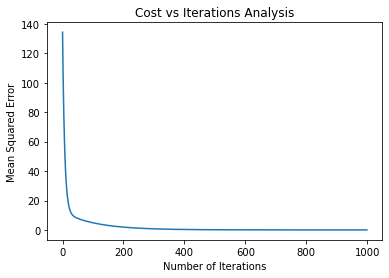

In [ ]:
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(iterations),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

In [ ]:
# Prediction

# Generate data points like before
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

# Show the data point
data_string = 'Data point: {}, {}'
print(data_string.format(X_test, y_test))

Data point: [[1.90019295]
 [2.49170831]
 [1.34976129]
 [1.50835349]
 [0.72884509]
 [2.8125541 ]
 [0.58919217]
 [2.59292955]
 [2.87251891]
 [0.30277162]], [[13.75499643]
 [14.03498054]
 [12.36533794]
 [12.23180643]
 [11.05548239]
 [15.09967869]
 [10.42343644]
 [15.12651411]
 [15.01648907]
 [ 9.63918871]]


In [ ]:
prediction = predict(X_test, W, b)
prediction

array([[13.28948114],
       [14.50211132],
       [12.16107418],
       [12.48619455],
       [10.88817109],
       [15.15985803],
       [10.60187702],
       [14.70961892],
       [15.28278831],
       [10.01470342]])

In [ ]:
score = float(sum(np.round(prediction) == np.round(y_test)))/ float(len(y_test))
score

0.7

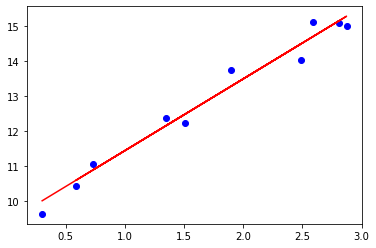

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="original")
plt.plot(X_test, prediction, color="red", label="predicted")

In [ ]:
# Let's talk about one star now!

#Generate one data point
X_test = 3*np.random.rand(1,1)
y_test = 9 + 2*X_test + np.random.rand(1,1)

# Show the data point
data_string = 'Data point: {}, {}'
print(data_string.format(X_test, y_test))

Data point: [[1.78506592]], [[13.400561]]


In [ ]:
prediction = predict(X_test, W, b)
prediction

array([[13.05346611]])

In [ ]:
score = float(sum(np.round(prediction) == np.round(y_test)))/ float(len(y_test))
score

1.0

In [ ]:
if prediction >= thresh:
    print('We\'ve got a big star..')
else:
    print('We\'ve got a cute lil star!')

We've got a big star..
